In [1]:
import matplotlib.pyplot as plt
import straph as sg

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

# Induced Graphs and Substreams

Let's start by loading an example of a Stream Graph.

Nb of Nodes :  6
Nb of segmented nodes :  11.0
Nb of links :  7
Nb of segmented links :  10.0
Nb of event times :  10


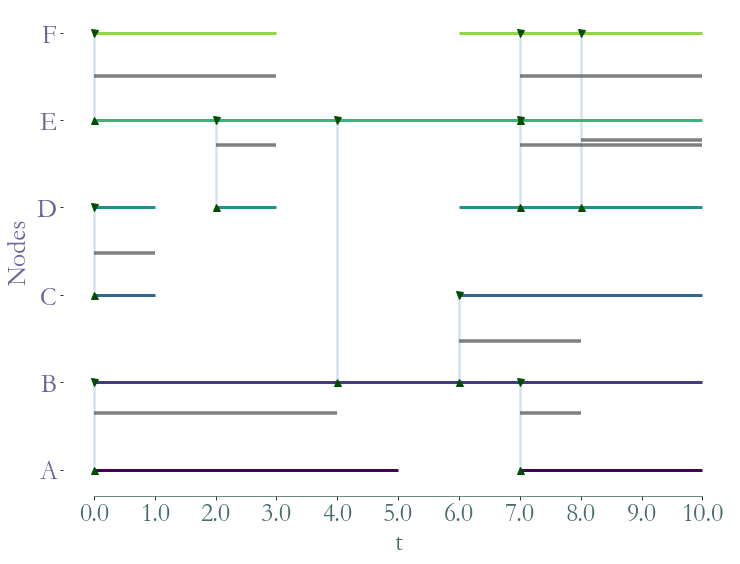

In [3]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "example_nodes.sg",
                      path_links=path_directory + "example_links.sg")
S.describe()
_ = S.plot()

As in graphs, one may want to extract a specific subpart of a stream graph.

## Aggregated Graph

Let's take a look at the aggregated Stream Graph. We remove all temporal information and aggregate the structural one.

In [4]:
a_l = S.aggregated_graph() # This method returns an adjacency list

We can visualise this graph with networkx.

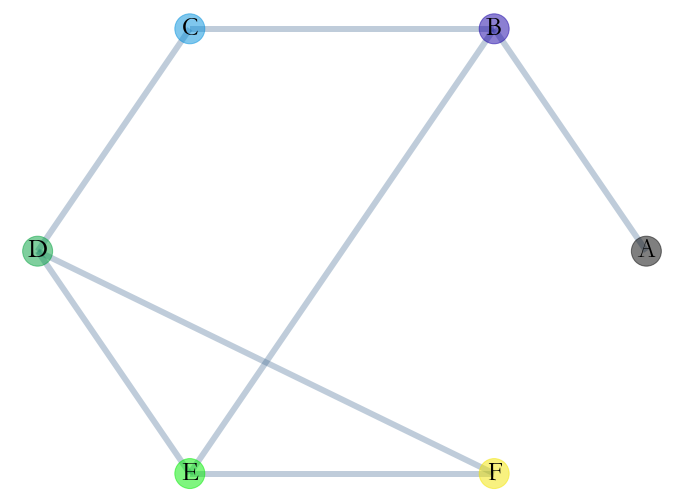

In [5]:
_ = S.plot_aggregated_graph()

## Instant Graph

Similarly we can extract the instant graph at any time instant in the initial time windows.
For example at instant *t=7.0*.

In [6]:
a_l = S.instant_graph(7) # This method returns an adjacency list

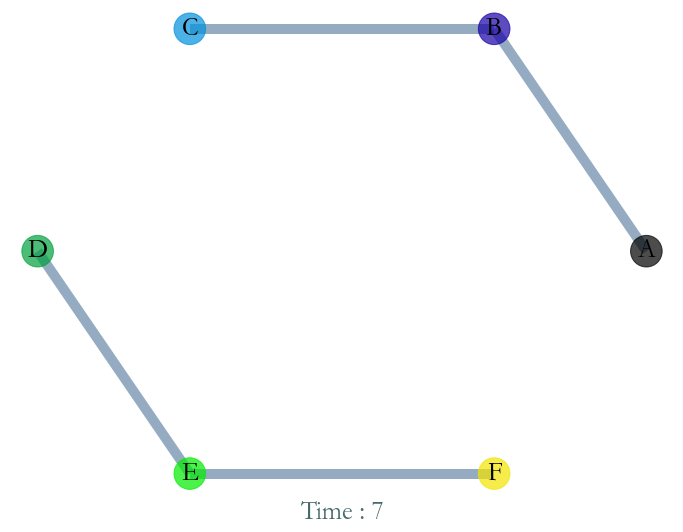

In [7]:
_ = S.plot_instant_graph(7)

## Substreams

We define several types of substreams:
    - substreams based on nodes (or node's label)
    - substreams based on links
    - substreams based on time
                              

### Substreams based on time

We can extract the substream corresponding to a given time windows.
For example, we extract the substream between the instant 3 and 7.

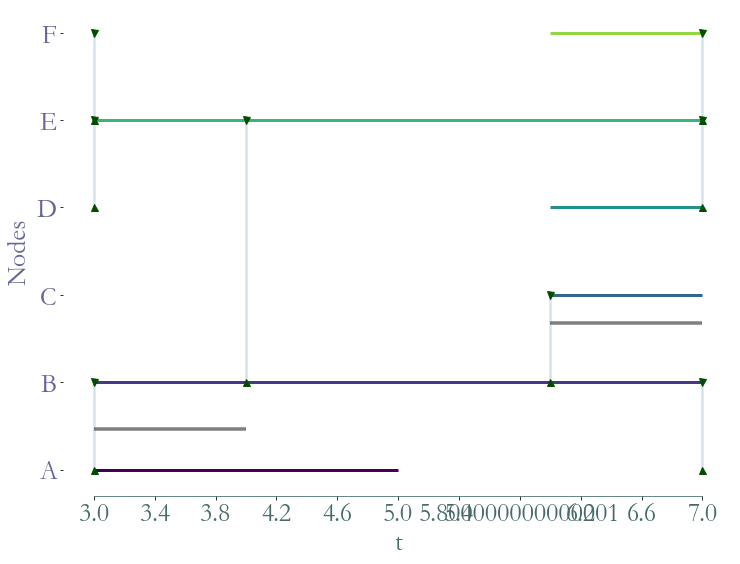

In [8]:
ss = S.induced_substream_by_time_window([3,7])
_ = ss.plot()

### Substreams based on nodes

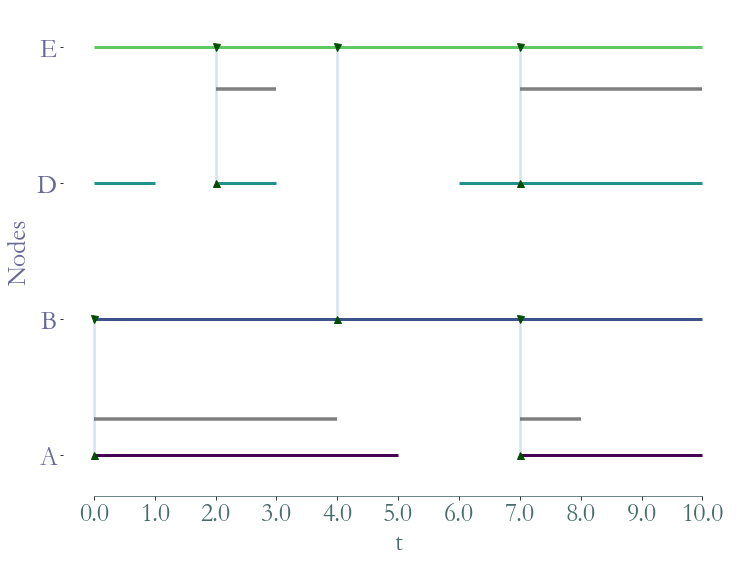

In [9]:
# We can filter by nodes or by their label
ss = S.induced_substream_by_nodes([0,1,3,4])
_ = ss.plot()

Straph allows to extract a substream by a list of nodes (elements of *V*).

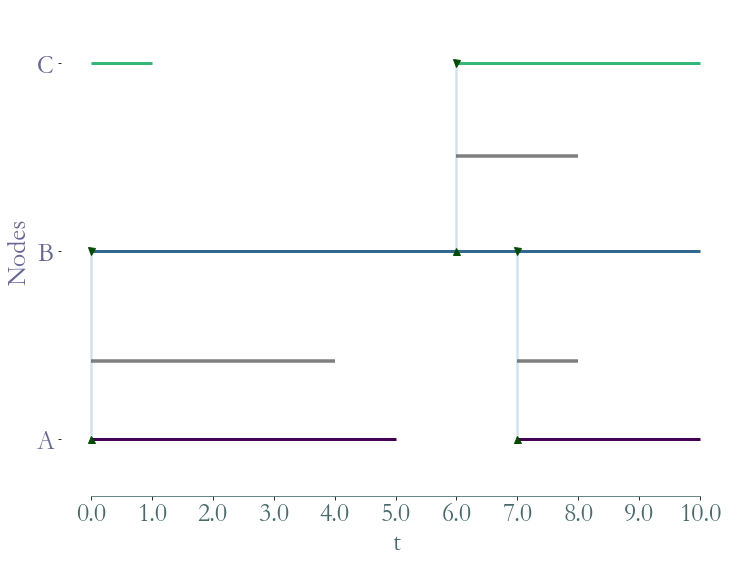

In [10]:
ss = S.induced_substream_by_nodes(['A','B','C'])
_ = ss.plot()

### Substreams based on temporal nodes

We can also extract a substream with a list of temporal nodes.
The function *substream* takes as a parameter a cluster: a list of temporal nodes (element of *W*). 

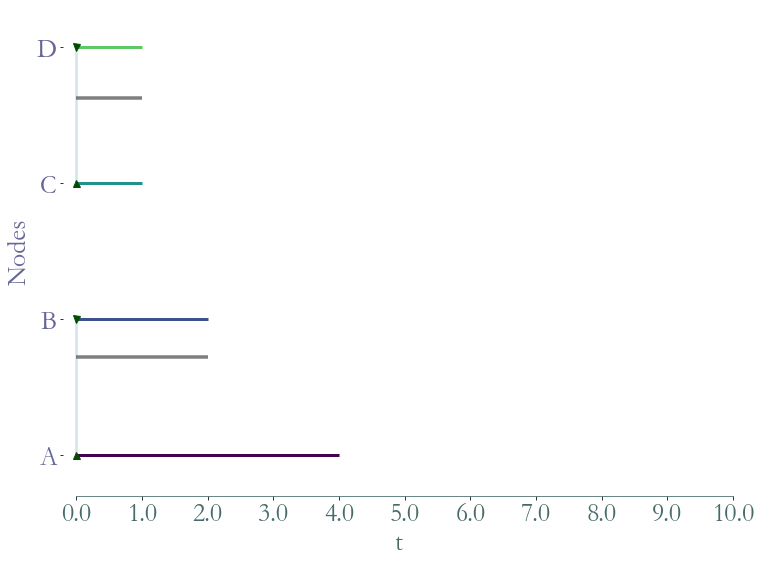

In [11]:
ss = S.substream([(0,4,0),(0,2,1),(0,1,2),(0,1,3)])
_ = ss.plot()

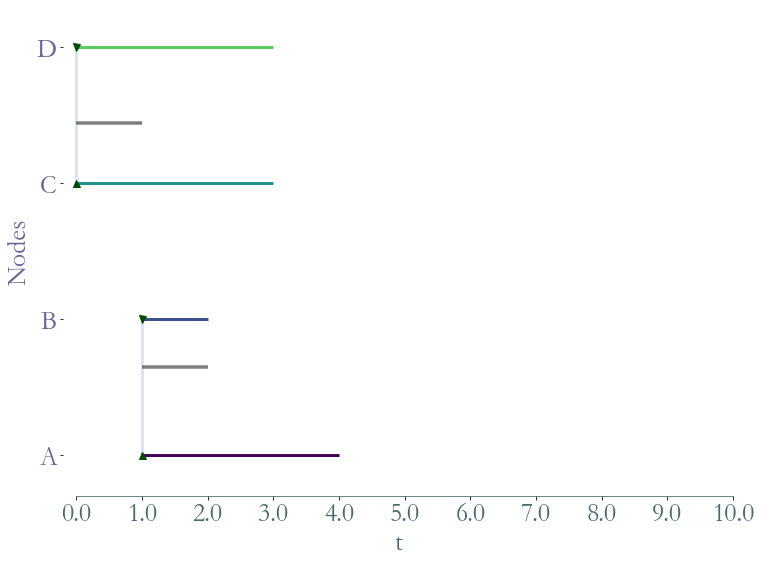

In [12]:
ss = S.substream([(1,4,'A'),(1,2,'B'),(0,3,'C'),(0,3,'D')])
_ = ss.plot()

### Substreams based on links

Likewise we can extract a substream with a list of links (nodes ids or labels).

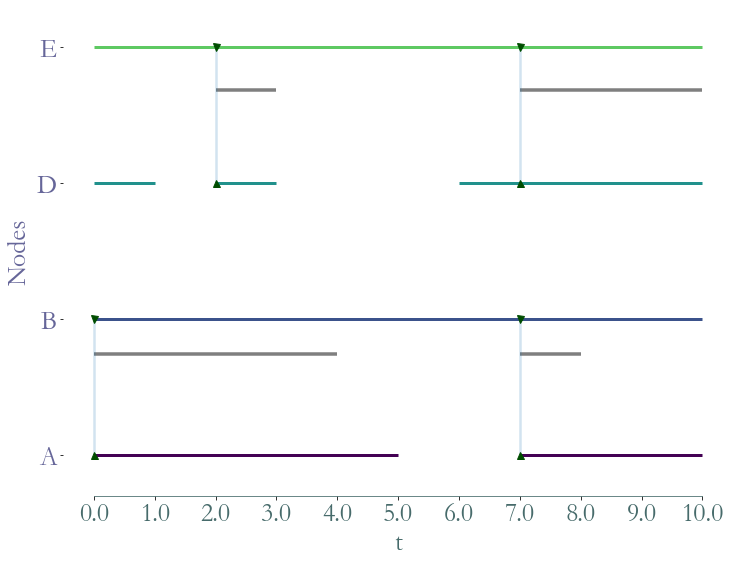

In [13]:
ss = S.induced_substream_by_links([(0,1),(3,4)])
_ = ss.plot()

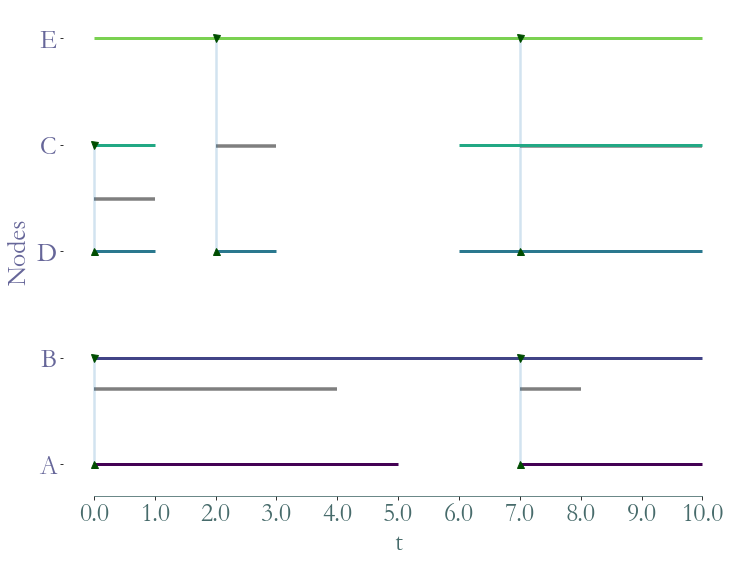

In [14]:
ss = S.induced_substream_by_links([('A','B'),('C','D'),('C','E'),('E','D')])
_ = ss.plot()

## Filtering

We can combine previous filters to get a very particular substream.
For example if we want the nodes $A$ and $(3,4,B)$ as well as the link $(C,D)$ during the time window $[1,9]$.

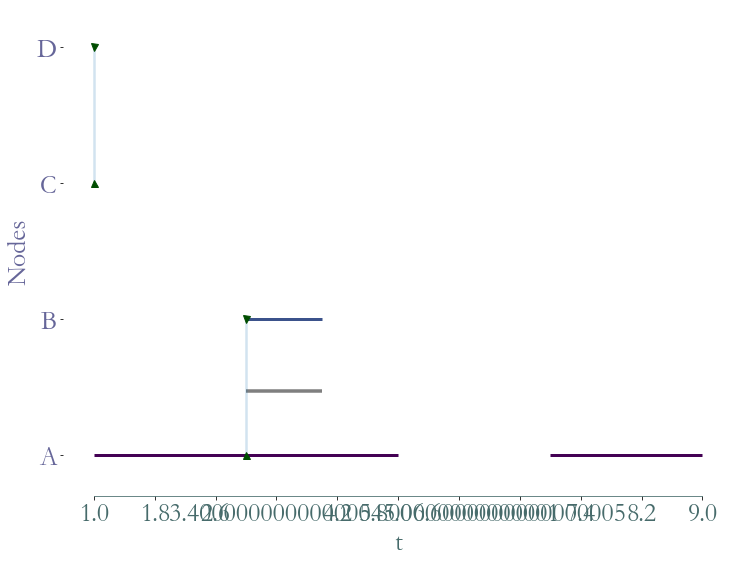

In [15]:
# If we filter by label, we get the reverse index:
label_to_node = {v:k for k,v in S.node_to_label.items()}
# Then we get the whole presence of 'A' and the presence of the link between 'C' and 'D'
prez_A = S.node_presence[label_to_node['A']]
cluster_A = [(t0,t1,'A') for t0,t1 in zip(prez_A[::2],prez_A[1::2])]

for i,l in enumerate(S.links):
    if l == (label_to_node['C'],label_to_node['D']) or l == (label_to_node['D'],label_to_node['C']):
        prez_CD = S.link_presence[i]
        break

cluster_C = [(t0,t1,'C') for t0,t1 in zip(prez_CD[::2],prez_CD[1::2])]
cluster_D = [(t0,t1,'D') for t0,t1 in zip(prez_CD[::2],prez_CD[1::2])]

cluster_B = [(3,4,'B')]

ss = S.substream(cluster_A+cluster_B+cluster_C+cluster_D)
# Filter by the time window:
ss = ss.induced_substream_by_time_window([1,9])

_ = ss.plot()